<a href="https://colab.research.google.com/github/dixitritik17/ritik/blob/master/CNN_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

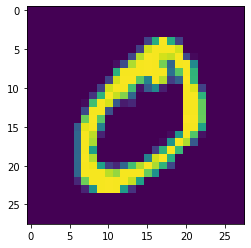

0


In [12]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1]) 
plt.show()
print(y_train[1])

In [0]:
#Reshape the data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)


#Normalize the pixel values from a scale out of 255 to a scale out of 1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [14]:
print(y_train[0])

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

print(y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu',
                              input_shape=input_shape))

model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation='softmax'))

In [16]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

hist=model.fit(x_train, y_train,
          batch_size=128,
          epochs=30,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 136s 2ms/step - loss: 0.2651 - accuracy: 0.9182 - val_loss: 0.0572 - val_accuracy: 0.9812
Epoch 2/30
60000/60000 [==============================] - 140s 2ms/step - loss: 0.0900 - accuracy: 0.9737 - val_loss: 0.0434 - val_accuracy: 0.9858
Epoch 3/30
60000/60000 [==============================] - 135s 2ms/step - loss: 0.0679 - accuracy: 0.9798 - val_loss: 0.0347 - val_accuracy: 0.9884
Epoch 4/30
60000/60000 [==============================] - 136s 2ms/step - loss: 0.0576 - accuracy: 0.9830 - val_loss: 0.0313 - val_accuracy: 0.9897
Epoch 5/30
60000/60000 [==============================] - 136s 2ms/step - loss: 0.0467 - accuracy: 0.9858 - val_loss: 0.0316 - val_accuracy: 0.9896
Epoch 6/30
60000/60000 [==============================] - 142s 2ms/step - loss: 0.0420 - accuracy: 0.9873 - val_loss: 0.0295 - val_accuracy: 0.9897
Epoch 7/30
60000/60000 [==============================] - 137s

In [17]:
print(model.evaluate(x_test, y_test))

10000/10000 [==============================] - 6s 601us/step
[0.03240353517539348, 0.991599977016449]


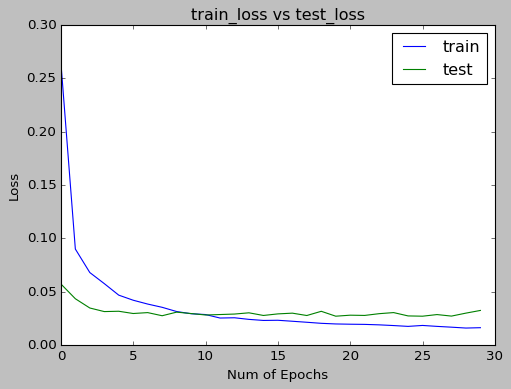

In [25]:
train_acc=hist.history['accuracy']
test_acc=hist.history['val_accuracy']
train_error=hist.history['loss']
test_error=hist.history['val_loss']
xc=range(30)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_error)
plt.plot(xc,test_error)
plt.xlabel('Num of Epochs')
plt.ylabel('Loss')
plt.title('train_loss vs test_loss')
plt.legend(['train','test'])
plt.style.use(['classic'])

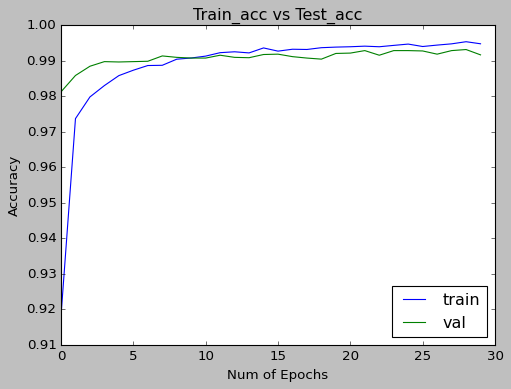

In [26]:
plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,test_acc)
plt.xlabel('Num of Epochs')
plt.ylabel('Accuracy')
plt.title('Train_acc vs Test_acc')
plt.legend(['train','val'],loc=4)
plt.style.use(['classic'])

In [28]:
model.summary()
#test=99.31
#train=99.53 till 29 epoch 



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)              